## GPU check

In [1]:
!nvidia-smi -L


GPU 0: Tesla T4 (UUID: GPU-fe4e7606-0167-2128-a5ca-6730a23cf4aa)


In [2]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("enable gpu from runtime")

Default GPU Device:/device:GPU:0


## mounting gdrive 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load dataset from kaggle

In [4]:
!pip install opendatasets --upgrade --quiet

In [5]:
!wget https://raw.githubusercontent.com/afschowdhury/config-files/main/kaggle.json?token=GHSAT0AAAAAABUSKKM3ZFMQLIQLF7LPSYI4YUALKOA

--2022-05-15 03:45:25--  https://raw.githubusercontent.com/afschowdhury/config-files/main/kaggle.json?token=GHSAT0AAAAAABUSKKM3ZFMQLIQLF7LPSYI4YUALKOA
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-05-15 03:45:25 ERROR 404: Not Found.



In [6]:
dataset_url = "https://www.kaggle.com/furcifer/bangla-newspaper-dataset?select=data_v2"
import opendatasets as od

od.download(dataset_url)

Skipping, found downloaded files in "./bangla-newspaper-dataset" (use force=True to force download)


## Loading data from json file 

In [7]:
import json 


with open("bangla-newspaper-dataset/data_v2/data_v2.json", encoding = "utf-8") as dt:
  data = json.load(dt) 

## Data Analysis

In [8]:
type(data)

list

In [9]:
type(data[0])

dict

In [10]:
len(data)

408471

In [11]:
data[0].keys()

dict_keys(['author', 'category', 'category_bn', 'published_date', 'modification_date', 'tag', 'comment_count', 'title', 'url', 'content'])

In [12]:
data[0]

{'author': 'গাজীপুর প্রতিনিধি',
 'category': 'bangladesh',
 'category_bn': 'বাংলাদেশ',
 'comment_count': 0,
 'content': 'গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায় আজ বৃহস্পতিবার রাতের টিফিন খেয়ে একটি পোশাক কারখানার ৫০০ শ্রমিক অসুস্থ হয়ে পড়েছেন। এ ঘটনায় বিক্ষোভ করেছেন ওই কারখানার শ্রমিকেরা।সফিপুর মডার্ন হাসপাতালের জরুরি বিভাগের চিকিত্সক আল আমিন প্রথম আলো ডটকমকে বলেন, খাদ্যে বিষক্রিয়ায় তাঁরা (শ্রমিকেরা) অসুস্থ হয়ে পড়েছেন। এতে আতঙ্কিত হওয়ার কিছু নেই। অসুস্থদের চিকিত্সা দেওয়া হয়েছে।কারখানার শ্রমিক ও পুলিশ সূত্রে জানা যায়, উপজেলার তেলিরচালা এলাকার সেজাদ সোয়েটার লিমিটেড কারখানার শ্রমিকদের আজ রাত সাড়ে সাতটার দিকে টিফিন দেওয়া হয়। টিফিনে ছিল ডিম, রুটি, পেটিস ও কলা। টিফিন খেয়ে শ্রমিকেরা যথারীতি কাজে যোগ দেন। ওই টিফিন খাওয়ার প্রায় এক ঘণ্টা পর রাত সাড়ে আটটার দিকে কয়েকজন শ্রমিকের বমি ও পেট ব্যথা শুরু হয়। এরপর ধীরে ধীরে পুরো কারখানার শ্রমিকেরা অসুস্থ হতে থাকে। অনেকেই কারখানার মেঝেতে ঢলে পড়ে। এতে পাঁচ শতাধিক শ্রমিক অসুস্থ হয়ে পড়ে।পরে কারখানা কর্তৃপক্ষ দ্রুত যানবাহনের ব্য

In [13]:
data[0]['content']

'গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায় আজ বৃহস্পতিবার রাতের টিফিন খেয়ে একটি পোশাক কারখানার ৫০০ শ্রমিক অসুস্থ হয়ে পড়েছেন। এ ঘটনায় বিক্ষোভ করেছেন ওই কারখানার শ্রমিকেরা।সফিপুর মডার্ন হাসপাতালের জরুরি বিভাগের চিকিত্সক আল আমিন প্রথম আলো ডটকমকে বলেন, খাদ্যে বিষক্রিয়ায় তাঁরা (শ্রমিকেরা) অসুস্থ হয়ে পড়েছেন। এতে আতঙ্কিত হওয়ার কিছু নেই। অসুস্থদের চিকিত্সা দেওয়া হয়েছে।কারখানার শ্রমিক ও পুলিশ সূত্রে জানা যায়, উপজেলার তেলিরচালা এলাকার সেজাদ সোয়েটার লিমিটেড কারখানার শ্রমিকদের আজ রাত সাড়ে সাতটার দিকে টিফিন দেওয়া হয়। টিফিনে ছিল ডিম, রুটি, পেটিস ও কলা। টিফিন খেয়ে শ্রমিকেরা যথারীতি কাজে যোগ দেন। ওই টিফিন খাওয়ার প্রায় এক ঘণ্টা পর রাত সাড়ে আটটার দিকে কয়েকজন শ্রমিকের বমি ও পেট ব্যথা শুরু হয়। এরপর ধীরে ধীরে পুরো কারখানার শ্রমিকেরা অসুস্থ হতে থাকে। অনেকেই কারখানার মেঝেতে ঢলে পড়ে। এতে পাঁচ শতাধিক শ্রমিক অসুস্থ হয়ে পড়ে।পরে কারখানা কর্তৃপক্ষ দ্রুত যানবাহনের ব্যবস্থা করে তাদের সফিপুর জেনারেল হাসপাতাল, সফিপুর মডার্ন হাসপাতাল, উপজেলা স্বাস্থ্য কমপ্লেক্সসহ বিভিন্ন ক্লিনিকে ভর্তি করে

In [14]:
len(data[0]['content'])

1752

In [15]:
cat_set = set(a['category'] for a in data)
cat_set

{'bangladesh',
 'economy',
 'education',
 'entertainment',
 'international',
 'life-style',
 'opinion',
 'sports',
 'technology'}

In [16]:
len(cat_set)

9

In [17]:
all_cat = [a['category']for a in data]

In [18]:
len(data)  == len(all_cat) , len(data)

(True, 408471)

### Select categories with data more than 7000

In [19]:
# data in each category 
cat_count = []

for cat in (cat_set):
  cat_count.append(all_cat.count(cat))
cat_count

[15699, 30466, 17245, 9721, 232504, 10852, 12116, 49012, 30856]

In [20]:
sorted(cat_count)[::-1]

[232504, 49012, 30856, 30466, 17245, 15699, 12116, 10852, 9721]

In [21]:
cat_set

{'bangladesh',
 'economy',
 'education',
 'entertainment',
 'international',
 'life-style',
 'opinion',
 'sports',
 'technology'}

In [22]:
# bind category with their occurence
z = zip(cat_count, cat_set)
z = list(z)
z

[(15699, 'opinion'),
 (30466, 'entertainment'),
 (17245, 'economy'),
 (9721, 'education'),
 (232504, 'bangladesh'),
 (10852, 'life-style'),
 (12116, 'technology'),
 (49012, 'sports'),
 (30856, 'international')]

<BarContainer object of 9 artists>

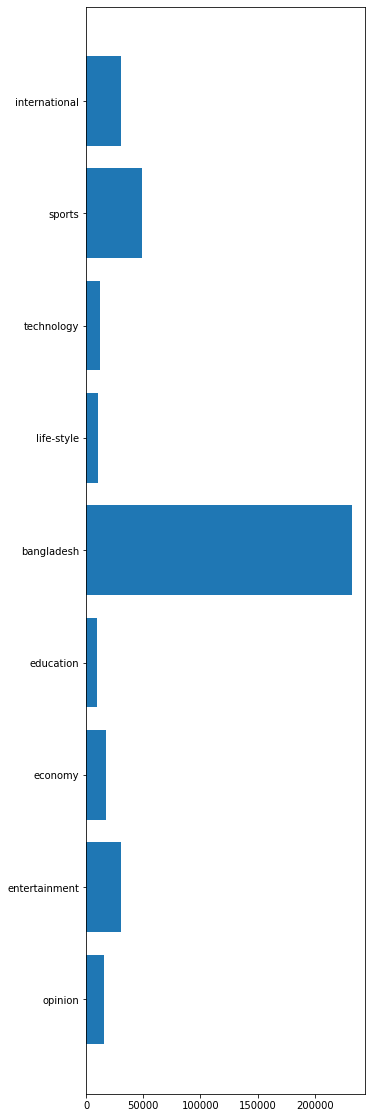

In [23]:
import matplotlib.pyplot as plt


categories = {}
for index, (x, y) in enumerate(z)  :
  categories[y] = x

fig , ax = plt.subplots(figsize=(5,20))

# ax.bar(categories.keys(), categories.values())
ax.barh(list(categories.keys()),list(categories.values()))

In [24]:
sel_cats = []

for cat in cat_set :
  if cat != "bangladesh":
    sel_cats.append(cat)
sel_cats

['opinion',
 'entertainment',
 'economy',
 'education',
 'life-style',
 'technology',
 'sports',
 'international']

In [25]:
len(sel_cats) , len(cat_set)  # selected category vs total category 

(8, 9)

In [26]:
# collect selected categories 

X_text = []
y_label = []

for i in data :
  if i['category'] in sel_cats:
    X_text.append(i['content'])
    y_label.append(i['category'])

In [27]:
X_text[0]

'এবারের উইম্বলডনটা স্মরণীয় করে রাখার মিশনেই যেন নেমেছেন সাবিনা লিসিকি। চতুর্থ রাউন্ডের লড়াইয়ে সেরেনা উইলিয়ামসকে হারিয়ে শুরু করেছিলেন স্বপ্নযাত্রা। কোয়ার্টার ফাইনালে কাইয়া কানেপিকে হারাতে খুব একটা বেগ পেতে হয়নি। তবে সেমিফাইনালে কঠিন প্রতিপক্ষের মুখেই পড়তে হয়েছিল লিসিকিকে। র্যাঙ্কিংয়ের চার নম্বরে থাকা আগ্নিয়েস্কা রাদভানস্কাই ছিলেন আজকের ম্যাচের ফেবারিট। কিন্তু অঘটনের উইম্বলডনে উল্টোটাই ঘটবে, এটাই যেন স্বাভাবিক। হলোই তা-ই। উত্তেজনাপূর্ণ সেমিফাইনালে ৬-৪, ২-৬, ৯-৭ গেমের জয় দিয়ে লিসিকি প্রথমবারের মতো পা রাখলেন উইম্বলডনের ফাইনালে।প্রথম সেটে ৬-৪ গেমের জয় দিয়ে শুরুটা দারুণভাবে করেছিলেন জার্মান তারকা লিসিকি। দ্বিতীয় সেটে ঘুরে দাঁড়ান রাদভানস্কা। খেলায় সমতা ফেরান ২-৬ গেমের জয় দিয়ে। ফলাফল নির্ধারণী তৃতীয় সেটের শুরুতেও বেশ খানিকটা সময় এগিয়ে ছিলেন রাদভানস্কা। কিন্তু ৩-০ ব্যবধানে পিছিয়ে পড়ার পর যেন মরিয়া হয়ে ওঠেন লিসিকি। ঘুরে দাঁড়াতে থাকেন নাটকীয়ভাবে। দুই ঘণ্টা ১৮ মিনিটের শ্বাসরুদ্ধকর লড়াইয়ের পর শেষ হাসিটাও হেসেছেন ২৩ বছর বয়সী লিসিকি।উইম্বলডনের অপর সেমিফাইনালে মারিওন ব

In [28]:
y_label[0]

'sports'

In [29]:
len(X_text) == len(y_label) , len(y_label)

(True, 175967)

In [30]:

set(y_label)

{'economy',
 'education',
 'entertainment',
 'international',
 'life-style',
 'opinion',
 'sports',
 'technology'}

In [31]:
sorted(sel_cats)

['economy',
 'education',
 'entertainment',
 'international',
 'life-style',
 'opinion',
 'sports',
 'technology']

In [32]:
len(set(y_label)) == len(sel_cats)

True

## Convert the categorical labels to numeric 


In [33]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

class_labels = encoder.fit_transform(y_label)

In [34]:
len(class_labels) == len(y_label)

True

In [35]:
set(class_labels)

{0, 1, 2, 3, 4, 5, 6, 7}

In [36]:
encoder.inverse_transform(list(set(class_labels)))

array(['economy', 'education', 'entertainment', 'international',
       'life-style', 'opinion', 'sports', 'technology'], dtype='<U13')

In [37]:

list(zip(set(class_labels), list(encoder.inverse_transform(list(set(class_labels))))))

[(0, 'economy'),
 (1, 'education'),
 (2, 'entertainment'),
 (3, 'international'),
 (4, 'life-style'),
 (5, 'opinion'),
 (6, 'sports'),
 (7, 'technology')]

In [38]:
type(class_labels) 

numpy.ndarray

In [39]:
class_labels.shape

(175967,)

In [40]:
import numpy as np
np.shape(np.reshape(class_labels, newshape=(class_labels.shape[0], 1)))

(175967, 1)

In [41]:
# apply one hot encoding to the class label for binary encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False)

class_labels = class_labels.reshape((class_labels.shape[0],1))
y_ohe = encoder.fit_transform(class_labels)

In [42]:

y_ohe.shape

(175967, 8)

In [43]:
y_ohe[1]

array([0., 0., 0., 0., 0., 0., 0., 1.])

In [44]:
class_labels[1]

array([7])

## tokenize the texts input to convert tokens to numeric


In [45]:
X_text[0]

'এবারের উইম্বলডনটা স্মরণীয় করে রাখার মিশনেই যেন নেমেছেন সাবিনা লিসিকি। চতুর্থ রাউন্ডের লড়াইয়ে সেরেনা উইলিয়ামসকে হারিয়ে শুরু করেছিলেন স্বপ্নযাত্রা। কোয়ার্টার ফাইনালে কাইয়া কানেপিকে হারাতে খুব একটা বেগ পেতে হয়নি। তবে সেমিফাইনালে কঠিন প্রতিপক্ষের মুখেই পড়তে হয়েছিল লিসিকিকে। র্যাঙ্কিংয়ের চার নম্বরে থাকা আগ্নিয়েস্কা রাদভানস্কাই ছিলেন আজকের ম্যাচের ফেবারিট। কিন্তু অঘটনের উইম্বলডনে উল্টোটাই ঘটবে, এটাই যেন স্বাভাবিক। হলোই তা-ই। উত্তেজনাপূর্ণ সেমিফাইনালে ৬-৪, ২-৬, ৯-৭ গেমের জয় দিয়ে লিসিকি প্রথমবারের মতো পা রাখলেন উইম্বলডনের ফাইনালে।প্রথম সেটে ৬-৪ গেমের জয় দিয়ে শুরুটা দারুণভাবে করেছিলেন জার্মান তারকা লিসিকি। দ্বিতীয় সেটে ঘুরে দাঁড়ান রাদভানস্কা। খেলায় সমতা ফেরান ২-৬ গেমের জয় দিয়ে। ফলাফল নির্ধারণী তৃতীয় সেটের শুরুতেও বেশ খানিকটা সময় এগিয়ে ছিলেন রাদভানস্কা। কিন্তু ৩-০ ব্যবধানে পিছিয়ে পড়ার পর যেন মরিয়া হয়ে ওঠেন লিসিকি। ঘুরে দাঁড়াতে থাকেন নাটকীয়ভাবে। দুই ঘণ্টা ১৮ মিনিটের শ্বাসরুদ্ধকর লড়াইয়ের পর শেষ হাসিটাও হেসেছেন ২৩ বছর বয়সী লিসিকি।উইম্বলডনের অপর সেমিফাইনালে মারিওন ব

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_text) # Only words known by the tokenizer will be taken into account
X_token = tokenizer.texts_to_sequences(X_text) # Transforms each text in texts to a sequence of integers


In [47]:
type(tokenizer.word_index)

dict

In [48]:
for index, token  in enumerate(tokenizer.word_index):
  print(token)
  if index == 10:
    break


ও
এই
করে
থেকে
এ
না
করা
জন্য
সঙ্গে
আর
করতে


In [49]:


vocab_size = len(tokenizer.word_index)+1 
vocab_size

1627184

In [50]:
tokenizer.texts_to_sequences(["আমার নাম ফয়সাল"])

[[66, 160, 28629]]

In [51]:
print(X_text[5])
print(X_token[5])

বিচ্ছেদের এক বছর পরও কেটি হোমসকে ভুলতে পারছেন না ‘মিশন ইমপসিবল’ তারকা টম ক্রুজ। আর তাই তো সম্প্রতি তিনি সাবেক স্ত্রীকে আবেগঘন এক চিঠি লিখেছেন পুনর্মিলনের আশাবাদ ব্যক্ত করে।এ প্রসঙ্গে ঘনিষ্ঠ সূত্রের বরাতে কনট্যাক্টমিউজিক জানিয়েছে, কেটির বিচ্ছেদের আবেদনের পরিপ্রেক্ষিতে গত বছরের জুলাইয়ে পাঁচ বছরের দাম্পত্যের ইতি টানার চূড়ান্ত সিদ্ধান্ত নিয়েছিলেন কেটি ও ক্রুজ। দেখতে দেখতে বছর ঘুরে আবার জুলাই মাস এসে গেছে। কেটিকে কোনোভাবেই মন থেকে মুছে ফেলতে পারছেন না ক্রুজ। তিনি উপলব্ধি করেছেন, আজীবন কেটিকে ভালোবেসে যাওয়া ছাড়া তাঁর সামনে আর কোনো পথ খোলা নেই।হঠাৎ করেই গত বছর ক্রুজের ৫০তম জন্মদিনের কয়েকদিন আগে তাঁকে ছেড়ে চলে যান কেটি। ওই ঘটনায় কেবল ক্রুজই অবাক হননি, অবাক হয়েছিল পুরো বিশ্ব। শুরুতে কেটির ওপর ক্ষুব্ধ হলেও দিনের পর দিন ক্রুজ ভেবেছেন কেন তাঁকে ছেড়ে চলে গেলেন কেটি। শেষ পর্যন্ত কেটির সেই কঠিন সিদ্ধান্ত নেওয়ার পেছনের কারণ অনুধাবন করতে পেরেছেন ক্রুজ।কেটির ওপর থেকে রাগ ও অভিমান পুরোপুরি সরাতে দীর্ঘ সময় লেগেছে ক্রুজের। গত মার্চে তাঁদের পুনর্মিলনের চেষ্টা করেছিলেন মধ্যস্থতাকারীরা। কিন্তু কো

In [52]:
len(X_text[5]) , len(X_token[5]) 

(1350, 212)

In [53]:
for i in "আমার নাম ফয়সাল":
  print(i)

আ
ম
া
র
 
ন
া
ম
 
ফ
য
়
স
া
ল


In [54]:




len("আমার নাম ফয়সাল")

15

In [55]:
if "ফয়সাল" in tokenizer.word_index:
  print(tokenizer.word_index["ফয়সাল"])

28629


In [56]:





tokenizer.sequences_to_texts([X_token[5]])

['বিচ্ছেদের এক বছর পরও কেটি হোমসকে ভুলতে পারছেন না ‘মিশন ইমপসিবল’ তারকা টম ক্রুজ। আর তাই তো সম্প্রতি তিনি সাবেক স্ত্রীকে আবেগঘন এক চিঠি লিখেছেন পুনর্মিলনের আশাবাদ ব্যক্ত করে।এ প্রসঙ্গে ঘনিষ্ঠ সূত্রের বরাতে কনট্যাক্টমিউজিক জানিয়েছে কেটির বিচ্ছেদের আবেদনের পরিপ্রেক্ষিতে গত বছরের জুলাইয়ে পাঁচ বছরের দাম্পত্যের ইতি টানার চূড়ান্ত সিদ্ধান্ত নিয়েছিলেন কেটি ও ক্রুজ। দেখতে দেখতে বছর ঘুরে আবার জুলাই মাস এসে গেছে। কেটিকে কোনোভাবেই মন থেকে মুছে ফেলতে পারছেন না ক্রুজ। তিনি উপলব্ধি করেছেন আজীবন কেটিকে ভালোবেসে যাওয়া ছাড়া তাঁর সামনে আর কোনো পথ খোলা নেই।হঠাৎ করেই গত বছর ক্রুজের ৫০তম জন্মদিনের কয়েকদিন আগে তাঁকে ছেড়ে চলে যান কেটি। ওই ঘটনায় কেবল ক্রুজই অবাক হননি অবাক হয়েছিল পুরো বিশ্ব। শুরুতে কেটির ওপর ক্ষুব্ধ হলেও দিনের পর দিন ক্রুজ ভেবেছেন কেন তাঁকে ছেড়ে চলে গেলেন কেটি। শেষ পর্যন্ত কেটির সেই কঠিন সিদ্ধান্ত নেওয়ার পেছনের কারণ অনুধাবন করতে পেরেছেন ক্রুজ।কেটির ওপর থেকে রাগ ও অভিমান পুরোপুরি সরাতে দীর্ঘ সময় লেগেছে ক্রুজের। গত মার্চে তাঁদের পুনর্মিলনের চেষ্টা করেছিলেন মধ্যস্থতাকারীরা। কিন্তু কোন

## pad the sequences


In [57]:



from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 300

X_pad = pad_sequences(X_token, padding = "post", maxlen = maxlen)



In [58]:
type(X_pad)

numpy.ndarray

In [59]:
X_pad.shape

(175967, 300)

In [60]:
y_ohe.shape

(175967, 8)

In [61]:
vocab_size

1627184

In [62]:
maxlen

300

In [63]:
X_pad[0]

array([   599, 171336,  17280,      3,    595,  92603,    179,   8765,
         8146, 131791,    940,   8294,   8295,   7830, 102112,   3547,
           46,    466,  98611,   8615,    763, 236869, 280924,   3041,
          107,     68,   8906,    366,   2876,     26,   2112,    548,
         1907,   9000,   3088,   2552, 280925,  69433,    206,   2664,
          208,  89902, 355676,    148,   1088,    335,  17450,     16,
        16978,  21599,  45122,   5730,    814,    179,   3599,  41734,
           28,   7272,  25246,   2112,    216,    184,     99,    216,
          287,    264,  10949,   3220,    469, 125257,   1248,     89,
          833,   5625,  13931, 355677,   4782,    216,    184,  10949,
         3220,    469,   2364,   6350,    466,   2174,    547, 131791,
         1677,   4782,    905,  39646, 105773,   9191,   4779,   8440,
           99,    216,  10949,   3220,  10130,   1606,  10272,   3190,
        11309,  29577,    134,   2755,    439,   2371,    148, 105773,
      

In [64]:
len(X_token[0]) , len(X_pad[0])

(173, 300)

In [65]:
unique, counts = np.unique(X_pad[0] , return_counts=True)
padded_zeros = dict(zip(unique, counts))[0]

In [66]:
len(X_pad[0]) - len(X_token[0])  == padded_zeros , padded_zeros

(True, 127)

## Bag Of Words

In [67]:
# running this cell may crash the runtime due to ram overloading !!!

In [68]:
# from collections import Counter
# from tqdm.notebook import tqdm_notebook
# word_ls = []

# for sen in tqdm_notebook(X_text):
#     word_ls.extend(sen.split())

In [69]:
# len(word_ls)

In [70]:
# Counter = Counter(word_ls)
# most_occured_20 = Counter.most_common(20)
# most_occured_20

In [71]:
# most_occured_50 = Counter.most_common(50)
# most_occured_50

## Divide dataset into train and test set 

In [72]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits = 2, test_size=0.3, random_state=25)
sss.get_n_splits(X_pad, y_ohe)


2

In [73]:
for train_index, test_index in sss.split(X_pad, y_ohe):
    X_train, X_test = X_pad[train_index], X_pad[test_index]
    y_train, y_test = y_ohe[train_index], y_ohe[test_index]

# Define and Train the model

In [74]:
# import layers 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, Dense , LSTM , GRU

# embedding dimension
embedding_dim = 16

# epochs

epochs = 100

# batch size 

batch_size = 32

## Bidirectional LSTM

In [75]:
model_bi_directional_lstm = Sequential(name = "bidirectional_lstm")
model_bi_directional_lstm.add(Embedding(
    input_dim = vocab_size,
    output_dim = embedding_dim, 
    input_length= maxlen
))

model_bi_directional_lstm.add(Bidirectional(LSTM(128, return_sequences = True)))
model_bi_directional_lstm.add(Bidirectional(LSTM(128)))
model_bi_directional_lstm.add(Dense(8,activation = 'softmax'))
model_bi_directional_lstm.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])
model_bi_directional_lstm.summary()


Model: "bidirectional_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 16)           26034944  
                                                                 
 bidirectional (Bidirectiona  (None, 300, 256)         148480    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 8)                 2056      
                                                                 
Total params: 26,579,720
Trainable params: 26,579,720
Non-trainable params: 0
_________________________________________________________________


In [76]:
vocab_size * 16   == 26034944

True

In [77]:
y_train.shape , X_train.shape

((123176, 8), (123176, 300))

### setup tensorboard 

In [ ]:
# may full the google drive and raise google drive error

In [78]:

# import datetime
# SAVE_DIR = "drive/MyDrive/DL_models/bangla-news-rnn/model_logs"
# def create_tensorboard_callback(dir_name, experiment_name):
  
#   log_dir = dir_name + "/" + experiment_name + "/tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#   tensorboard_callback = tf.keras.callbacks.TensorBoard(
#       log_dir=log_dir
#   )
#   print(f"Saving TensorBoard log files to: {log_dir}")
#   return tensorboard_callback


### setup backup callback 


In [79]:
import tensorflow as tf
bi_lstm_backup_callback = tf.keras.callbacks.BackupAndRestore(
backup_dir="drive/MyDrive/DL_models/bangla-news-rnn/model_logs/BI-LSTM_MODEL/backup")

In [ ]:
bi_lstm_history = model_bi_directional_lstm.fit(X_train, y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2,
                    batch_size=batch_size ,
                    # callbacks = [create_tensorboard_callback(SAVE_DIR,"BI-LSTM_MODEL"),
                    #              bi_lstm_backup_callback])
                    callbacks = [bi_lstm_backup_callback])

Epoch 50/100
3080/3080 [==============================] - 262s 85ms/step - loss: 4.9471e-04 - accuracy: 0.9998 - val_loss: 0.4389 - val_accuracy: 0.9474
Epoch 51/100
3080/3080 [==============================] - 261s 85ms/step - loss: 5.9558e-04 - accuracy: 0.9998 - val_loss: 0.5336 - val_accuracy: 0.9422
Epoch 52/100
3080/3080 [==============================] - 260s 85ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.4987 - val_accuracy: 0.9430
Epoch 53/100
3080/3080 [==============================] - 261s 85ms/step - loss: 9.1095e-04 - accuracy: 0.9998 - val_loss: 0.4544 - val_accuracy: 0.9478
Epoch 54/100
3080/3080 [==============================] - 261s 85ms/step - loss: 4.7408e-04 - accuracy: 0.9998 - val_loss: 0.4494 - val_accuracy: 0.9476
Epoch 55/100
3080/3080 [==============================] - 262s 85ms/step - loss: 4.8873e-04 - accuracy: 0.9998 - val_loss: 0.4869 - val_accuracy: 0.9453
Epoch 56/100
3080/3080 [==============================] - 261s 85ms/step - loss: 4.821

### Plotting results

In [ ]:


plt.plot(bi_lstm_history.history['accuracy'])
plt.plot(bi_lstm_history.history['val_accuracy'])
plt.legend(['train', 'valid'])
plt.show()


In [ ]:
plt.plot(bi_lstm_history.history['loss'])
plt.plot(bi_lstm_history.history['val_loss'])
plt.legend(['train', 'valid'])
plt.show()

In [ ]:
model_bi_lstm_save_name = "bi-directional-lstm-model.h5"

saving_path_bi_lstm =saving_dir+model_bi_lstm_save_name
saving_path_bi_lstm

In [ ]:
model_bi_directional_lstm.save(saving_path_bi_lstm)

## LSTM model


In [ ]:
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=epochs,
#     decay_rate=0.9)


In [ ]:
model_lstm = Sequential(name = "lstm")
model_lstm.add(Embedding(
    input_dim = vocab_size,
    output_dim = embedding_dim, 
    input_length= maxlen
))

model_lstm.add(LSTM(128, return_sequences = True))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(8,activation = 'softmax'))
model_lstm.compile(optimizer = 'adam', #tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])
model_lstm.summary()


Model: "lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 8)            13017472  
                                                                 
 lstm (LSTM)                 (None, 300, 128)          70144     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 8)                 1032      
                                                                 
Total params: 13,220,232
Trainable params: 13,220,232
Non-trainable params: 0
_________________________________________________________________


In [ ]:
 8* vocab_size ==    13017472 

True

In [ ]:
y_train.shape , X_train.shape


((123176, 8), (123176, 300))

In [ ]:
import datetime
SAVE_DIR = "drive/MyDrive/DL_models/bangla-news-rnn/model_logs"
def create_tensorboard_callback(dir_name, experiment_name):
  
  log_dir = dir_name + "/" + experiment_name + "/tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback





In [ ]:
import tensorflow as tf
lstm_backup_callback = tf.keras.callbacks.BackupAndRestore(
backup_dir="drive/MyDrive/DL_models/bangla-news-rnn/model_logs/LSTM_MODEL/backup")

In [ ]:
lstm_history = model_lstm.fit(X_train, y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2,
                    batch_size=batch_size ,
                    callbacks = [create_tensorboard_callback(SAVE_DIR,"LSTM_MODEL"),
                                 lstm_backup_callback])

Saving TensorBoard log files to: drive/MyDrive/DL_models/bangla-news-rnn/model_logs/LSTM_MODEL/tensorboard/20220411-095131


OpError: ignored

In [ ]:

!tensorboard --logdir ./drive/MyDrive/DL_models/bangla-news-rnn/model_logs/LSTM_MODEL



2022-04-10 17:49:03.998556: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.8.0 at http://localhost:6006/ (Press CTRL+C to quit)


In [ ]:
lstm_history.params

In [ ]:
lstm_history.history.keys()

### Plotting losses and accuracies

In [ ]:
import matplotlib.pyplot as plt

plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.legend(['train', 'valid'])
plt.show()


In [ ]:
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.legend(['train', 'valid'])
plt.show()

### saving the model

In [ ]:
# define gloabl saving dir
saving_dir = "drive/MyDrive/DL_models/bangla-news-rnn/"

In [ ]:
model_lstm_save_name = "lstm-model.h5"

saving_path_lstm =saving_dir+model_lstm_save_name
saving_path_lstm

In [ ]:
model_lstm.save(saving_path_lstm)

## GRU model


In [ ]:
from tensorflow.keras.layers import GRU

model_gru = Sequential(name = "gru")
model_gru.add(Embedding(
    input_dim = vocab_size,
    output_dim = embedding_dim, 
    input_length= maxlen
))

model_gru.add(GRU(128, return_sequences = True))
model_gru.add(GRU(128))
model_gru.add(Dense(10,activation = 'softmax'))
model_gru.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])
model_gru.summary()

In [ ]:
gru_history = model_gru.fit(X_train, y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2,
                    batch_size=batch_size
                   )

### plotting results

In [ ]:
import matplotlib.pyplot as plt

plt.plot(gru_history.history['accuracy'])
plt.plot(gru_history.history['val_accuracy'])
plt.legend(['train', 'valid'])
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(gru_history.history['loss'])
plt.plot(gru_history.history['val_loss'])
plt.legend(['train', 'valid'])
plt.show()

In [ ]:
model_gru_save_name = "gru-model.h5"

saving_path_gru =saving_dir+model_gru_save_name
saving_path_gru

In [ ]:
model_gru.save(saving_path_gru)

## Plotting all data 

In [ ]:
fig,(lstm,gru, bi_lstm)  = plt.subplots(nrows = 3,
                                        ncols = 1,
                                        figsize = (15,15))


# lstm
lstm.plot(lstm_history.history['accuracy'])
lstm.plot(lstm_history.history['val_accuracy'])
lstm.legend(['train', 'valid'])
lstm.set_title("LSTM accuracies")

# gru

gru.plot(gru_history.history['accuracy'])
gru.plot(gru_history.history['val_accuracy'])
gru.legend(['train', 'valid'])
gru.set_title("GRU accuracies")

# bi -lstm

bi_lstm.plot(bi_lstm_history.history['accuracy'])
bi_lstm.plot(bi_lstm_history.history['val_accuracy'])
bi_lstm.legend(['train', 'valid'])
bi_lstm.set_title("Bi-directional accuracies")

fig.suptitle("Training and validation accuracies with epochs")

fig.show()


In [ ]:
# loss
fig,(lstm,gru, bi_lstm)  = plt.subplots(nrows = 3,
                                        ncols = 1,
                                        figsize = (15,15))


# lstm
lstm.plot(lstm_history.history['loss'])
lstm.plot(lstm_history.history['val_loss'])
lstm.legend(['train', 'valid'])
lstm.set_title("LSTM losses")

# gru

gru.plot(gru_history.history['loss'])
gru.plot(gru_history.history['val_loss'])
gru.legend(['train', 'valid'])
gru.set_title("GRU losses")

# bi -lstm

bi_lstm.plot(bi_lstm_history.history['loss'])
bi_lstm.plot(bi_lstm_history.history['val_loss'])
bi_lstm.legend(['train', 'valid'])
bi_lstm.set_title("Bi-directional losses")

fig.suptitle("Training and validation losses with epochs")

fig.show()
